<a href="https://colab.research.google.com/github/gpriya32/ANN/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [545]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [546]:
data=pd.read_csv('/content/Car_Purchasing_Data.csv', encoding = "ISO-8859-1")
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [547]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [548]:
data.columns


Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [549]:
col=['Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth']
x_data = data[col]
y_data = data['Car Purchase Amount']
x_data


,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382


In [550]:
y_data

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [551]:
x_data.iloc[:,0]

0          Bulgaria
1            Belize
2           Algeria
3      Cook Islands
4            Brazil
           ...     
495           Nepal
496        Zimbabwe
497     Philippines
498        Botswana
499          marlal
Name: Country, Length: 500, dtype: object

In [552]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_data.iloc[:,0] = le.fit_transform(x_data.iloc[:,0])
x_data


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,27,0,41.851720,62812.09301,11609.380910,238961.2505
1,17,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,1,43.152897,53798.55112,11160.355060,638467.1773
3,41,1,58.271369,79370.03798,14426.164850,548599.0524
4,26,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...
495,128,0,41.462515,71942.40291,6995.902524,541670.1016
496,208,1,37.642000,56039.49793,12301.456790,360419.0988
497,144,1,53.943497,68888.77805,10611.606860,764531.3203
498,24,1,59.160509,49811.99062,14013.034510,337826.6382


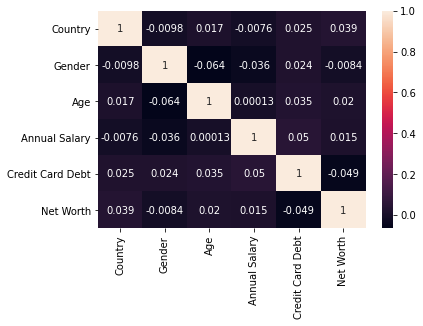

In [553]:
sns.heatmap(x_data.corr(),annot=True)

In [554]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = pd.DataFrame(min_max_scaler.fit_transform(x_data))
x_scale.columns=col
x_scale

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0.128571,0.0,0.437034,0.535151,0.578361,0.223430
1,0.080952,0.0,0.417412,0.583086,0.476028,0.521402
2,0.004762,1.0,0.463058,0.422482,0.555797,0.631089
3,0.195238,1.0,0.765427,0.742125,0.719908,0.539387
4,0.123810,1.0,0.746275,0.496614,0.264257,0.551331
...,...,...,...,...,...,...
495,0.609524,0.0,0.429250,0.649280,0.346528,0.532316
496,0.990476,1.0,0.352840,0.450494,0.613139,0.347366
497,0.685714,1.0,0.678870,0.611110,0.528221,0.759726
498,0.114286,1.0,0.783210,0.372650,0.699147,0.324313


In [555]:
y_scale=(y_data-min(y_data))/(max(y_data)-min(y_data))
y_scale

0      0.370725
1      0.508669
2      0.477827
3      0.822850
4      0.660781
         ...   
495    0.561992
496    0.316780
497    0.776722
498    0.513270
499    0.508552
Name: Car Purchase Amount, Length: 500, dtype: float64

Random Forest Regression


In [556]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size = 0.2, random_state = 0)

In [557]:
from sklearn.ensemble import RandomForestRegressor

In [558]:
randomForestFinalModel = RandomForestRegressor(max_depth = 7,max_leaf_nodes=30, max_features = 'auto', n_estimators = 100)


In [559]:
randomForestFinalModel.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=30,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [560]:
pred = randomForestFinalModel.predict(x_test)
pred


array([0.45713688, 0.47125853, 0.32996078, 0.60663987, 0.43435946,
       0.6003596 , 0.64943138, 0.73355834, 0.49237873, 0.33767086,
       0.52638368, 0.6190674 , 0.57234162, 0.73195948, 0.37912119,
       0.34862865, 0.52707321, 0.63681299, 0.46015972, 0.17160673,
       0.56042689, 0.39662077, 0.53619239, 0.33803483, 0.79406133,
       0.46699531, 0.5028804 , 0.55810345, 0.65996557, 0.71962468,
       0.4792619 , 0.39513875, 0.6406731 , 0.49125055, 0.77775692,
       0.69343742, 0.41228622, 0.75843611, 0.47407355, 0.52062295,
       0.61657406, 0.33839904, 0.3753934 , 0.42400685, 0.47183485,
       0.50794355, 0.53315843, 0.64255044, 0.43132413, 0.40661601,
       0.39081345, 0.44398105, 0.55617868, 0.61775853, 0.44906399,
       0.3591912 , 0.52813938, 0.65134501, 0.49700642, 0.60771093,
       0.42666746, 0.55212111, 0.44721104, 0.51317567, 0.48186075,
       0.58704016, 0.69859175, 0.27179505, 0.41637017, 0.57641627,
       0.53946975, 0.57214755, 0.24702454, 0.63180902, 0.52734

In [561]:
from sklearn.metrics import mean_absolute_error 
mae= mean_absolute_error(y_test,pred)
mae

0.03455441902876053

In [562]:
randomForestFinalModel.score(x_test, y_test)

0.9113019928441789

Artificial Neural Network


In [571]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=4, kernel_initializer='normal',activation='relu',input_dim=6))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=4,kernel_initializer='normal', activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer='normal',activation='relu'))

In [572]:
# compiling network
ann.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [573]:
ann.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 5         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [574]:
his=ann.fit(x_train, y_train,validation_split=0.15, batch_size = 32, epochs = 100)

Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 0.4854 - mean_absolute_error: 0.4854 - val_loss: 0.4986 - val_mean_absolute_error: 0.4986
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4730 - mean_absolute_error: 0.4730 - val_loss: 0.4857 - val_mean_absolute_error: 0.4857
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4595 - mean_absolute_error: 0.4595 - val_loss: 0.4713 - val_mean_absolute_error: 0.4713
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - val_loss: 0.4548 - val_mean_absolute_error: 0.4548
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4267 - mean_absolute_error: 0.4267 - val_loss: 0.4356 - val_mean_absolute_error: 0.4356
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - val_loss: 0.4129 - val_mean_absolute_error: 0.4129
Epoch 7/100
11/11 [==

In [575]:
ann_pred=ann.predict(x_test)
ann_pred

array([[0.42833602],
       [0.47037643],
       [0.33328155],
       [0.5985125 ],
       [0.41918856],
       [0.60075796],
       [0.68772423],
       [0.70498925],
       [0.4360283 ],
       [0.35929942],
       [0.5362163 ],
       [0.67428064],
       [0.63863856],
       [0.8105667 ],
       [0.32449293],
       [0.3718517 ],
       [0.554708  ],
       [0.6677224 ],
       [0.47530875],
       [0.09654018],
       [0.5561693 ],
       [0.43646634],
       [0.5402734 ],
       [0.28986883],
       [0.7949191 ],
       [0.5060728 ],
       [0.5000398 ],
       [0.51804787],
       [0.6866027 ],
       [0.6602988 ],
       [0.5790474 ],
       [0.5057538 ],
       [0.65291417],
       [0.47098178],
       [0.72228974],
       [0.6891328 ],
       [0.40718797],
       [0.7036134 ],
       [0.49350104],
       [0.49358234],
       [0.68491924],
       [0.3823485 ],
       [0.32159013],
       [0.39120275],
       [0.44949752],
       [0.5266973 ],
       [0.48506522],
       [0.618

In [576]:
ann.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0258 - mean_absolute_error: 0.0258


[0.025762973353266716, 0.025762973353266716]

In [577]:
from sklearn.metrics import explained_variance_score
acc=explained_variance_score(y_test,ann_pred)
# higher variance accuracy then random forest regression
acc

0.9574909723171398

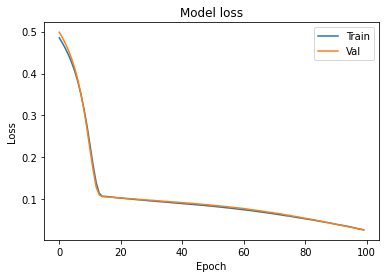

In [578]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()